# CARGANDO DATOS

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [62]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',3)

# **DATA SET PLANTA 2**

In [63]:
generation_data = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/data/Plant_2_Generation_Data.csv')

In [64]:
weather_data = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/data/Plant_2_Weather_Sensor_Data.csv')

In [65]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
4668,2020-05-17 05:15:00,4136001,IQ2d7wF4YD8zU1Q,0.000000,0.000000,0.000000,19959119.000000
10477,2020-05-20 00:30:00,4136001,oZZkBaNadn6DNKz,0.000000,0.000000,0.000000,1708110791.000000
15668,2020-05-23 03:30:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,0.000000,1795000507.000000
38562,2020-06-04 04:45:00,4136001,mqwcsP2rE7J0TFp,0.000000,0.000000,0.000000,593729410.000000
12032,2020-05-21 01:00:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,0.000000,1794986359.000000


SOURCE_KEY representa el modelo del inversor

In [66]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
35,2020-05-15 08:45:00,4136001,iq8k7ZNt4Mwm3w0,29.319021,40.738036,0.625400
2808,2020-06-13 07:15:00,4136001,iq8k7ZNt4Mwm3w0,23.963179,26.806507,0.130006
112,2020-05-16 04:15:00,4136001,iq8k7ZNt4Mwm3w0,23.826843,21.786381,0.000000
160,2020-05-16 16:15:00,4136001,iq8k7ZNt4Mwm3w0,33.872443,38.416914,0.219246
1591,2020-05-31 14:30:00,4136001,iq8k7ZNt4Mwm3w0,31.554354,40.079021,0.300513


In [67]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


**FUSIONANDO LOS DATOS DE AMBOS DATASETS**

In [68]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
43717,2020-06-06 15:15:00,xoJJ8DcxJEcupym,667.573333,653.106667,788.133333,209267670.533333,33.745831,45.243807,0.494922
40069,2020-06-04 22:00:00,Et9kgGMDl729KT4,0.000000,0.000000,2695.000000,1811165.000000,24.317472,22.526819,0.000000
32086,2020-06-01 02:45:00,LlT2YUhhzqhg5Sw,0.000000,0.000000,0.000000,282712203.000000,23.919526,22.849830,0.000000
66544,2020-06-17 10:45:00,V94E5Ben1TlhnDV,507.621429,497.700000,1092.214286,1412289283.214286,26.079587,31.061916,0.309599
48632,2020-06-08 23:15:00,NgDl19wMapZy17u,0.000000,0.000000,9167.000000,111700208.000000,25.684399,24.094589,0.000000


In [69]:
df_solar.iloc[1000:1005]

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1000,2020-05-15 11:15:00,Qf4GUc1pJu5T6c6,0.000,0.000,2402.000,8.384e+08,34.252,54.894,0.97
1001,2020-05-15 11:15:00,Quc1TzYxW2pYoWX,0.000,0.000,1324.000,3.295e+08,34.252,54.894,0.97
1002,2020-05-15 11:15:00,V94E5Ben1TlhnDV,1253.287,1221.980,3698.067,1.412e+09,34.252,54.894,0.97
1003,2020-05-15 11:15:00,WcxssY2VbP4hApt,1298.843,1266.371,3824.357,1.817e+08,34.252,54.894,0.97
1004,2020-05-15 11:15:00,mqwcsP2rE7J0TFp,1275.853,1243.953,3742.000,5.936e+08,34.252,54.894,0.97


In [70]:
len(df_solar)

67698

**AÑADIENDO COLUMNAS PARA TIEMPOS Y FECHAS**

In [71]:
# Añadiendo columnas para los dias, semanas, mes, hora...
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month


# Separando en horas y minutos
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# Date como string
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [72]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  HOURS                67698 non-

In [73]:
df_solar.isnull().sum()

,0
DATE_TIME,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DATE,0


**No hay valores faltantes en el dataset**

In [74]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,MINUTES,TOTAL MINUTES PASS
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,45.000000,1425.000000
std,nan,370.569597,362.112118,2919.448386,729667771.073221,4.021294,11.226446,0.309365,8.527546,0.499120,16.764084,415.672274


In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,4


CANTIDAD DE INVERSORES EN LA PLANTA 2

In [76]:
len(np.unique(df_solar['SOURCE_KEY']))

22

# DATA SET PLANTA 1


UTILIZANDO LA PLANTA 1

In [78]:
generation_data_test = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/data/Plant_1_Generation_Data.csv')

In [79]:
weather_data_test = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/data/Plant_1_Weather_Sensor_Data.csv')

In [80]:
generation_data_test.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
55849,11-06-2020 20:30,4135001,YxYtjZvoooNbGkE,0.000000,0.000000,5592.000000,7385279.000000
52710,10-06-2020 08:45,4135001,pkci93gMrogZuBj,6544.857143,641.171429,681.571429,7363397.571000
37621,03-06-2020 03:30,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6324784.000000
23202,26-05-2020 22:00,4135001,WRmjgnKYAwPKWDb,0.000000,0.000000,0.000000,7117880.000000
9663,19-05-2020 18:45,4135001,VHMLBKoKgIrUVDU,0.000000,0.000000,6988.000000,7239542.000000


In [81]:
weather_data_test.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
654,2020-05-22 10:00:00,4135001,HmiyD2TTLFNqkNe,27.585663,42.067015,0.542687
2116,2020-06-06 21:30:00,4135001,HmiyD2TTLFNqkNe,22.211206,20.508386,0.000000
1962,2020-06-05 07:00:00,4135001,HmiyD2TTLFNqkNe,22.578601,23.143766,0.104629
3102,2020-06-17 04:00:00,4135001,HmiyD2TTLFNqkNe,22.822976,22.151272,0.000000
230,2020-05-17 12:15:00,4135001,HmiyD2TTLFNqkNe,32.985549,55.094228,0.783589


AJUSTANDO EL FORMATO

In [82]:
generation_data_test['DATE_TIME'] = pd.to_datetime(generation_data_test['DATE_TIME'],format = '%d-%m-%Y %H:%M')
weather_data_test['DATE_TIME'] = pd.to_datetime(weather_data_test['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

**FUSIONANDO LOS DATOS DE AMBOS DATASETS**

In [83]:
df_solar_test = pd.merge(generation_data_test.drop(columns = ['PLANT_ID']), weather_data_test.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar_test.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
56813,2020-06-12 07:30:00,YxYtjZvoooNbGkE,923.000000,89.628571,88.571429,7385367.571000,21.926345,23.469942,0.061797
48246,2020-06-08 06:00:00,zBIq5rxdHJRwDNY,111.375000,10.737500,0.875000,6514911.875000,21.456706,20.327558,0.009470
44334,2020-06-06 09:00:00,ZnxXDlPa8U1GXgE,3926.625000,385.625000,1058.500000,6687757.500000,26.346307,38.737008,0.264578
28154,2020-05-29 14:45:00,3PZuoBAID5Wc2HD,8592.250000,840.712500,6660.750000,7100639.750000,32.079574,53.019841,0.652566
60277,2020-06-13 22:45:00,uHbuxQJl8lW7ozc,0.000000,0.000000,8437.000000,7260531.000000,22.265993,19.826632,0.000000


In [84]:
# Añadiendo columnas para los dias, semanas, mes, hora...
df_solar_test["DATE"] = pd.to_datetime(df_solar_test["DATE_TIME"]).dt.date
df_solar_test["TIME"] = pd.to_datetime(df_solar_test["DATE_TIME"]).dt.time
df_solar_test['DAY'] = pd.to_datetime(df_solar_test['DATE_TIME']).dt.day
df_solar_test['MONTH'] = pd.to_datetime(df_solar_test['DATE_TIME']).dt.month


# Separando en horas y minutos
df_solar_test['HOURS'] = pd.to_datetime(df_solar_test['TIME'],format='%H:%M:%S').dt.hour
df_solar_test['MINUTES'] = pd.to_datetime(df_solar_test['TIME'],format='%H:%M:%S').dt.minute
df_solar_test['TOTAL MINUTES PASS'] = df_solar_test['MINUTES'] + df_solar_test['HOURS']*60

# Date como string
df_solar_test["DATE_STRING"] = df_solar_test["DATE"].astype(str)
df_solar_test["HOURS"] = df_solar_test["HOURS"].astype(str)
df_solar_test["TIME"] = df_solar_test["TIME"].astype(str)

df_solar_test.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [85]:
df_solar_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  HOURS                68774 non-

In [86]:
df_solar_test.isnull().sum()

,0
DATE_TIME,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DATE,0


In [87]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar_test['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar_test['SOURCE_KEY'])
df_solar_test.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,1
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6.988e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,2
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7.603e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,3
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7.159e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,4


CANTIDAD DE INVERSORES EN LA PLANTA 1

In [88]:
len(np.unique(df_solar_test['SOURCE_KEY']))

22

# VISUALIZACION DE DATOS

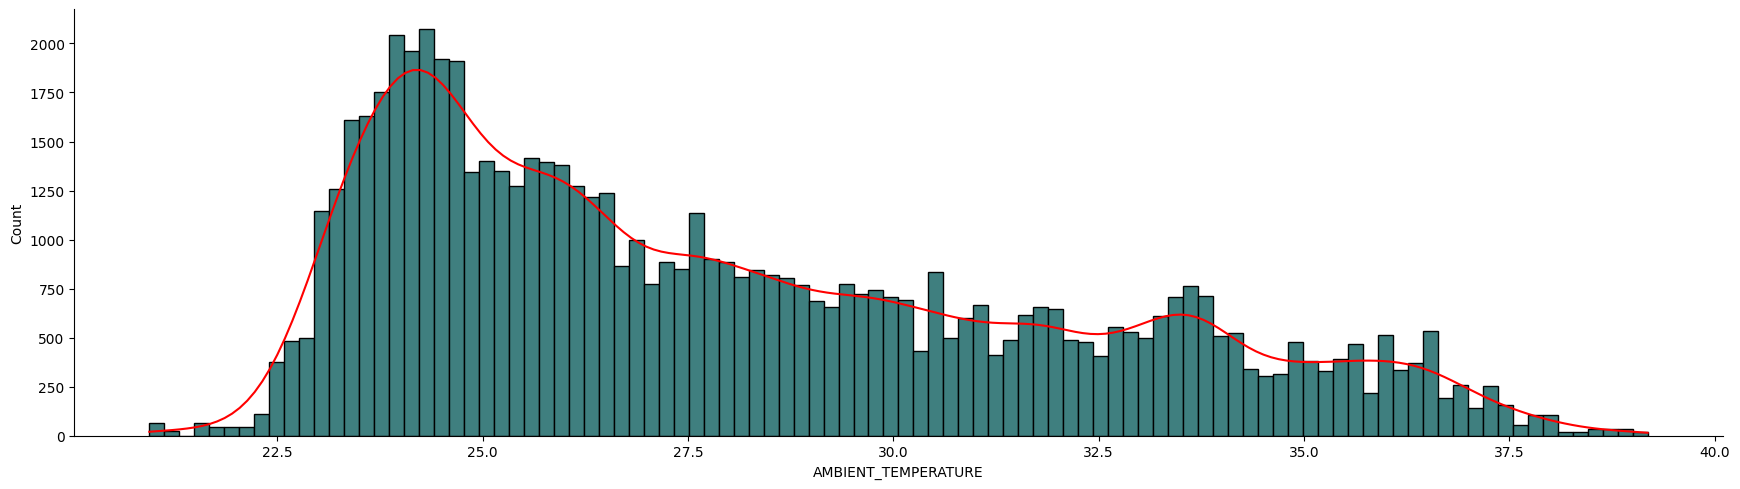

In [90]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [91]:
df_solar['DATE'].nunique()

34

El dato de generación de energía solar es de 34 días.

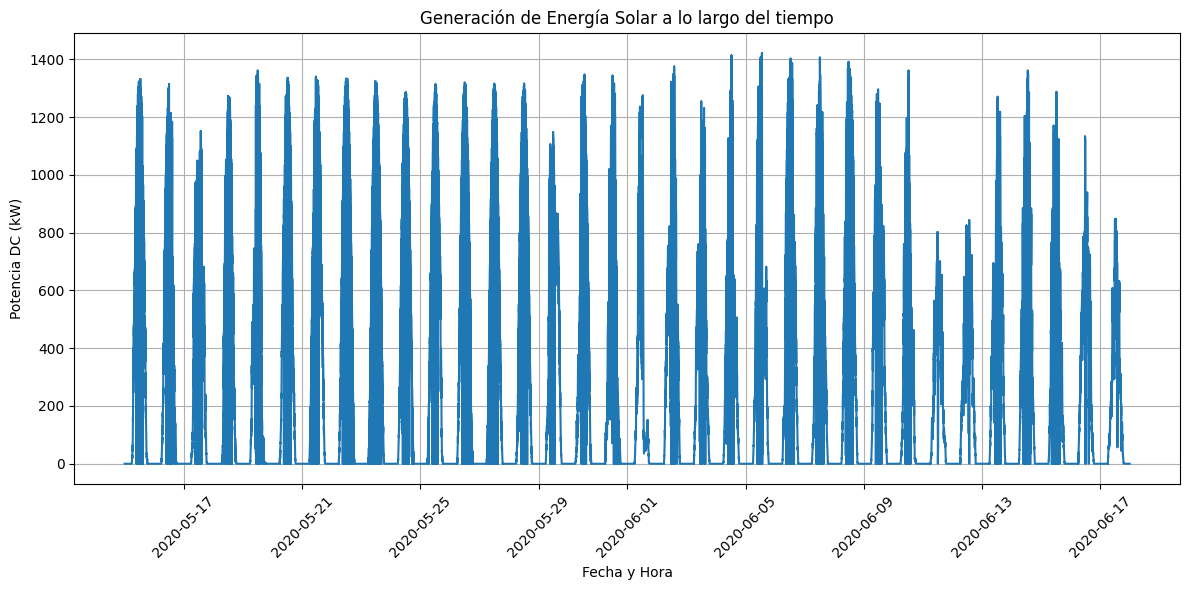

In [92]:
# Gráfico de la generación de energía a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_solar['DATE_TIME'], df_solar['DC_POWER'])
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia DC (kW)')
plt.title('Generación de Energía Solar a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

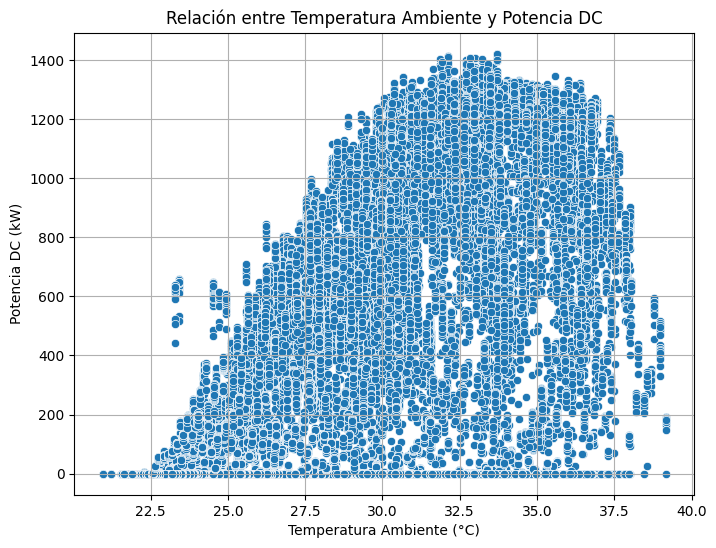

In [93]:
# Diagrama de dispersión entre temperatura ambiente y potencia DC
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', data=df_solar)
plt.xlabel('Temperatura Ambiente (°C)')
plt.ylabel('Potencia DC (kW)')
plt.title('Relación entre Temperatura Ambiente y Potencia DC')
plt.grid(True)
plt.show()

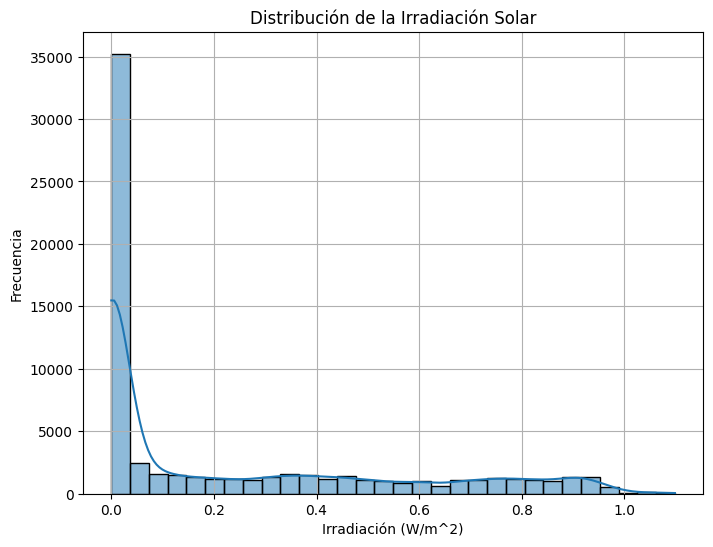

In [94]:
# Distribución de la irradiación solar
plt.figure(figsize=(8, 6))
sns.histplot(df_solar['IRRADIATION'], kde=True, bins=30)
plt.xlabel('Irradiación (W/m^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Irradiación Solar')
plt.grid(True)
plt.show()

IRRADIANCIA VERSUS GENERACION DE ENERGIA

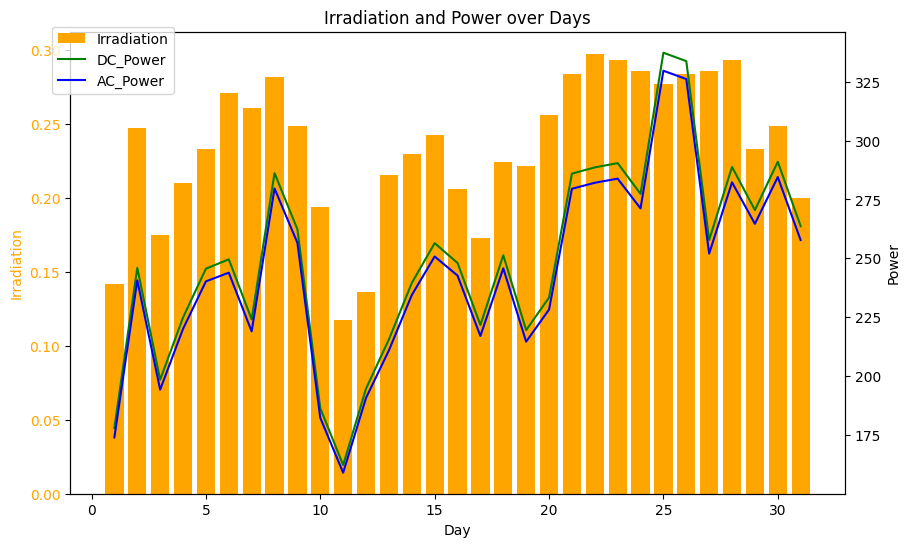

In [95]:
import matplotlib.pyplot as plt

# Filtrar datos y crear el día de cada fecha
df_solar['Day'] = df_solar['DATE_TIME'].dt.day
dc_power = df_solar.groupby('Day')['DC_POWER'].mean()
ac_power = df_solar.groupby('Day')['AC_POWER'].mean()
irradiation = df_solar.groupby('Day')['IRRADIATION'].mean()

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de Irradiation
ax1.bar(irradiation.index, irradiation.values, color='orange', label='Irradiation')
ax1.set_xlabel('Day')
ax1.set_ylabel('Irradiation', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Crear segundo eje y graficar DC y AC Power
ax2 = ax1.twinx()
ax2.plot(dc_power.index, dc_power.values, color='green', label='DC_Power')
ax2.plot(ac_power.index, ac_power.values, color='blue', label='AC_Power')
ax2.set_ylabel('Power', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Agregar leyenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.title('Irradiation and Power over Days')
plt.show()

ANALIZANDO LOS CASOS EN DONDE LA POTENCIA GENERADA ES 0

PLANTA 1

In [117]:
df_solar_test[df_solar_test[ ['DC_POWER', 'AC_POWER' ] ] == 0].groupby(df_solar_test['DATE_TIME' ].dt.hour) [['DC_POWER' ]].count()

,DC_POWER
DATE_TIME,
0,2724
1,2726
2,2810
3,2812
4,2815
5,2707
6,138
7,0
8,0


PLANTA 2

In [116]:
df_solar[df_solar[ ['DC_POWER', 'AC_POWER' ] ] == 0].groupby(df_solar['DATE_TIME' ].dt.hour) [['DC_POWER' ]].count()

,DC_POWER
DATE_TIME,
0,2808
1,2808
2,2808
3,2808
4,2808
5,2791
6,114
7,14
8,18


Se puede ver que la planta 1 tiene una mayor consistencia en los datos, durante la noche es donde mas se producen las caidad de potencia DC y AC. Es probable que en la planta 2 se hayan realizado paradas. En ambos casos se puede observar que estas paradas crecen de 11 a 13 durante el dia.

In [131]:
# Filtrar los datos donde Irradiation es mayor que 0 y DC_POWER es igual a 0
filtered_data1 = df_solar_test[(df_solar_test['IRRADIATION'] > 0) & (df_solar_test['DC_POWER'] == 0) & (df_solar_test['DATE_TIME' ].dt.hour >= 9) & (df_solar_test['DATE_TIME' ].dt.hour <= 15)]

# Ordenar los datos de forma creciente por la columna IRRADIATION
filtered_data1 = filtered_data1.sort_values(by='IRRADIATION', ascending=True)

# Mostrar los primeros resultados

len(filtered_data1)

63

In [129]:
# Filtrar los datos donde Irradiation es mayor que 0 y DC_POWER es igual a 0
filtered_data = df_solar[(df_solar['IRRADIATION'] > 0) & (df_solar['DC_POWER'] == 0)& (df_solar['DATE_TIME' ].dt.hour >= 11) & (df_solar['DATE_TIME' ].dt.hour <= 13)]

# Ordenar los datos de forma creciente por la columna IRRADIATION
filtered_data = filtered_data.sort_values(by='IRRADIATION', ascending=True)

# Mostrar los primeros resultados

len(filtered_data)

2402

ELIMINANDO LOS DATOS DE LA PLANTA 1, CON IRRADIANCIA MAYOR A 0, Y POTENCIA 0 ENTRE LAS 9 Y 15 HORAS

In [132]:
df_solar_test = df_solar_test[~((df_solar_test['IRRADIATION'] > 0) & (df_solar_test['DC_POWER'] == 0) & (df_solar_test['DATE_TIME' ].dt.hour >= 9) & (df_solar_test['DATE_TIME' ].dt.hour <= 15))]

# Verificar que se han eliminado las filas
df_solar_test[df_solar_test[ ['DC_POWER', 'AC_POWER' ] ] == 0].groupby(df_solar_test['DATE_TIME' ].dt.hour) [['DC_POWER' ]].count()


,DC_POWER
DATE_TIME,
0,2724
1,2726
2,2810
3,2812
4,2815
5,2707
6,138
7,0
8,0


# DETECCION DE FALLAS Y ANOMALIAS

**GRAFICOS DE GENERACION DE ENRGIA SOLAR**



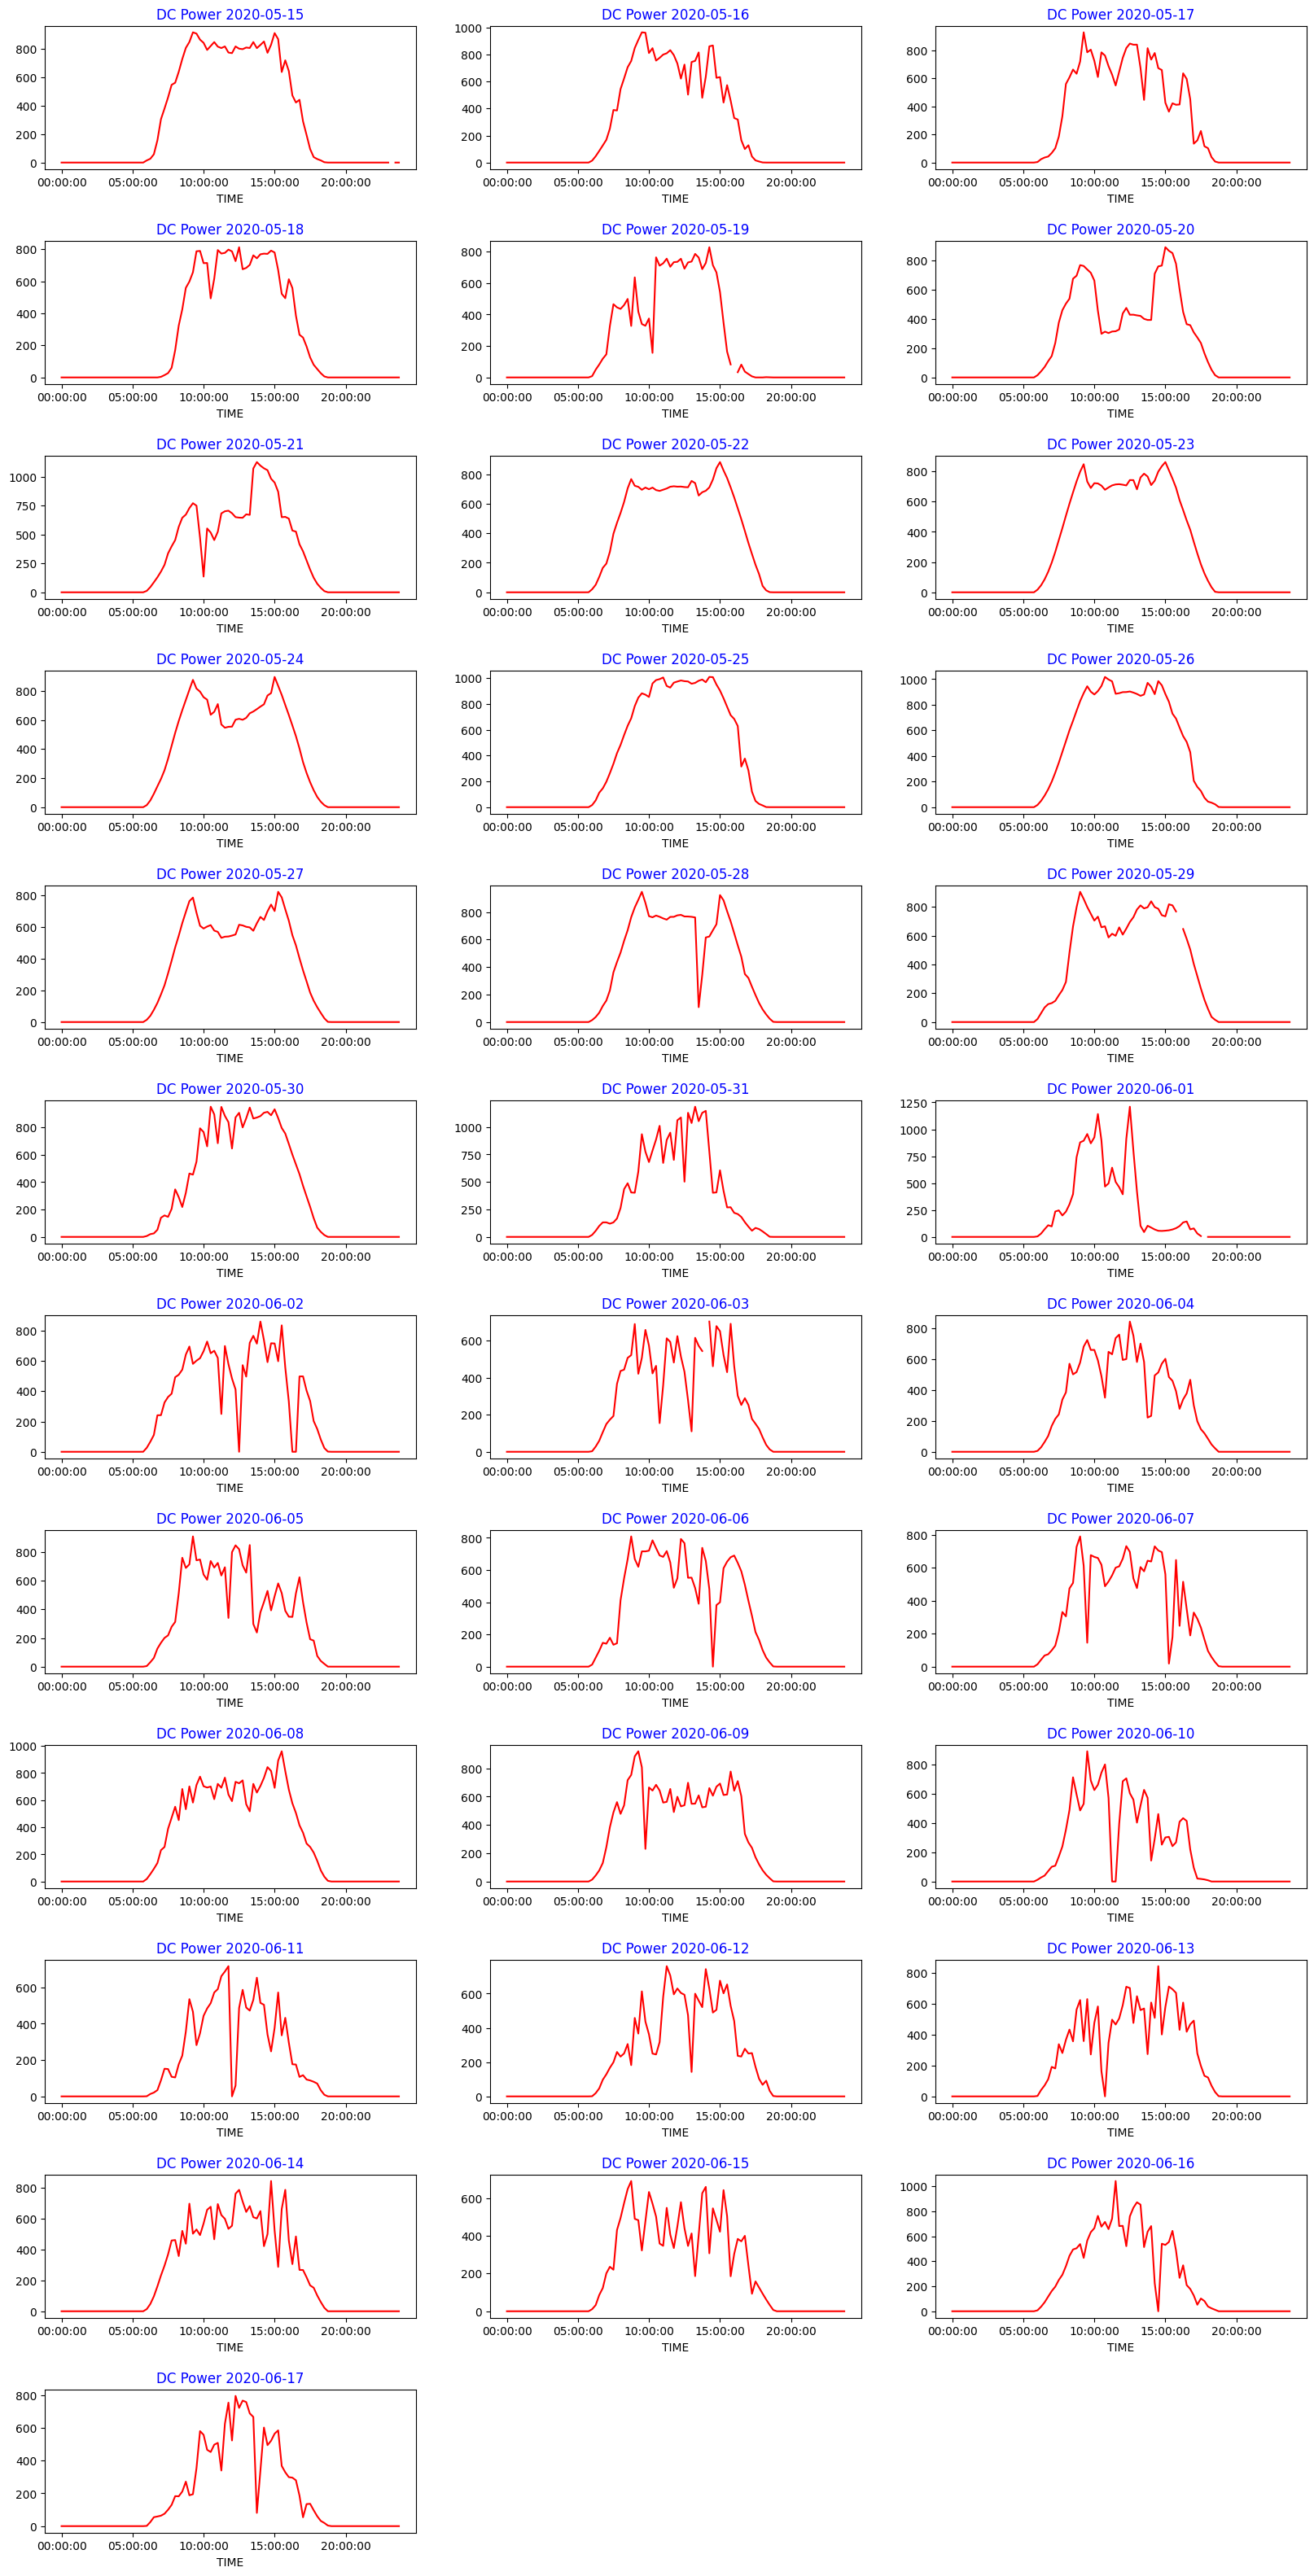

In [98]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

PRODUCCION IDEAL DE ENERGIA SOLAR EN UN DIA

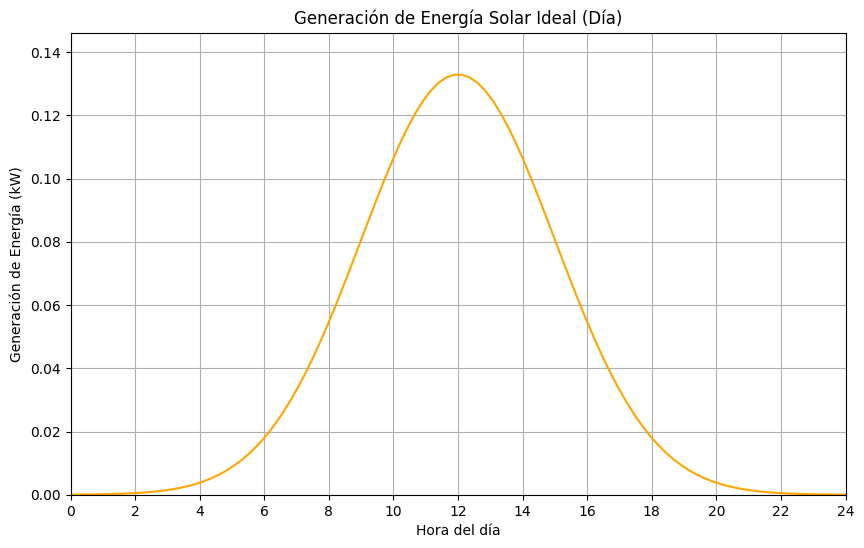

In [99]:

import matplotlib.pyplot as plt
import numpy as np

# Datos para la campana de Gauss
mu = 12  # Media (hora del día con máxima generación)
sigma = 3  # Desviación estándar (ancho de la campana)
x = np.linspace(0, 24, 100)  # Horas del día
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='orange')
plt.title('Generación de Energía Solar Ideal (Día)')
plt.xlabel('Hora del día')
plt.ylabel('Generación de Energía (kW)')
plt.grid(True)
plt.xlim(0, 24)  # Ajustar los límites del eje x
plt.ylim(0, max(y) * 1.1)  # Ajustar los límites del eje y para mejor visualización
plt.xticks(np.arange(0, 25, 2))  # Etiquetas del eje x cada 2 horas
plt.show()

La razón por la que obtenemos esta forma se basa en el ángulo del sol con respecto a los paneles. Temprano en la mañana, cuando el sol aún está saliendo, se encuentra esencialmente en su punto más bajo en el cielo. Para que la luz del sol llegue a los paneles a esta hora del día, tiene que atravesar la mayor cantidad de atmósfera. Es importante tener esto en cuenta, porque la energía del sol se absorbe cuando viaja a través de la atmósfera. Entonces, esto significa que cuanta más atmósfera atraviese, más energía se absorberá y menos estará disponible para que sus paneles la conviertan en electricidad. Al mediodía, cuando el sol está directamente sobre nosotros, la luz del sol no necesita atravesar tanta atmósfera. Por lo tanto, los paneles absorberán más luz solar durante este tiempo.

**CONSUMO DIARIO DE ENERGIA SOLAR**

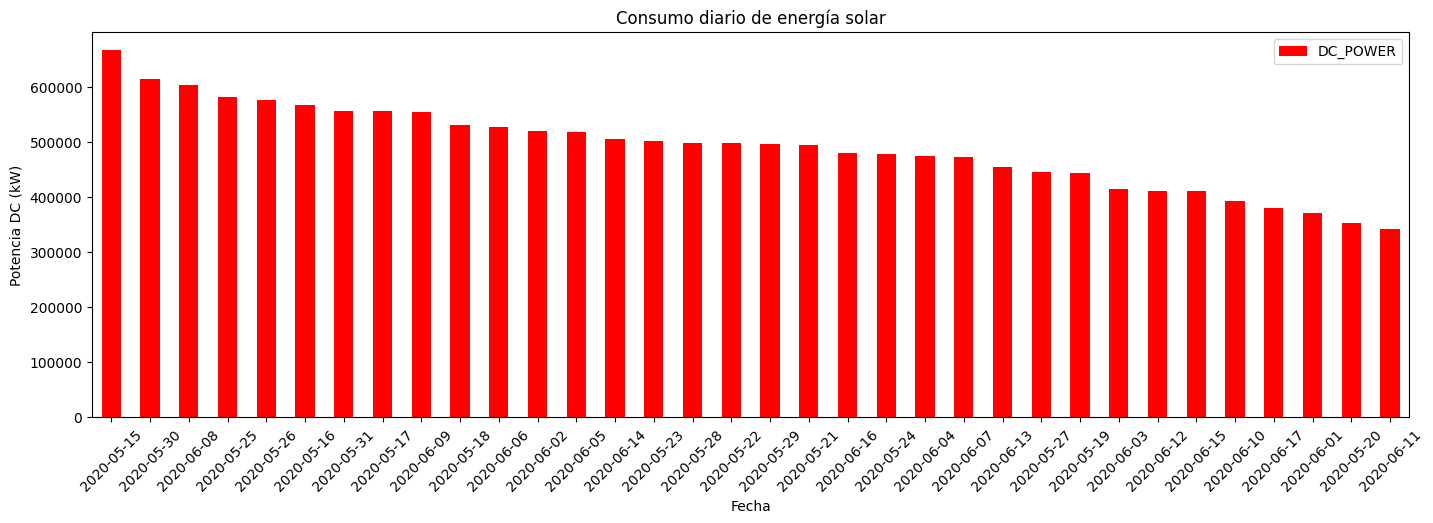

In [100]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Consumo diario de energía solar')
plt.ylabel('Potencia DC (kW)')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.show()

*   La generación de DC_POWER promedio más alta está activada: 2020-05-15
*   La generación de DC_POWER promedio más baja está activada: 2020-06-11

**IRRADIACION POR DIA.**

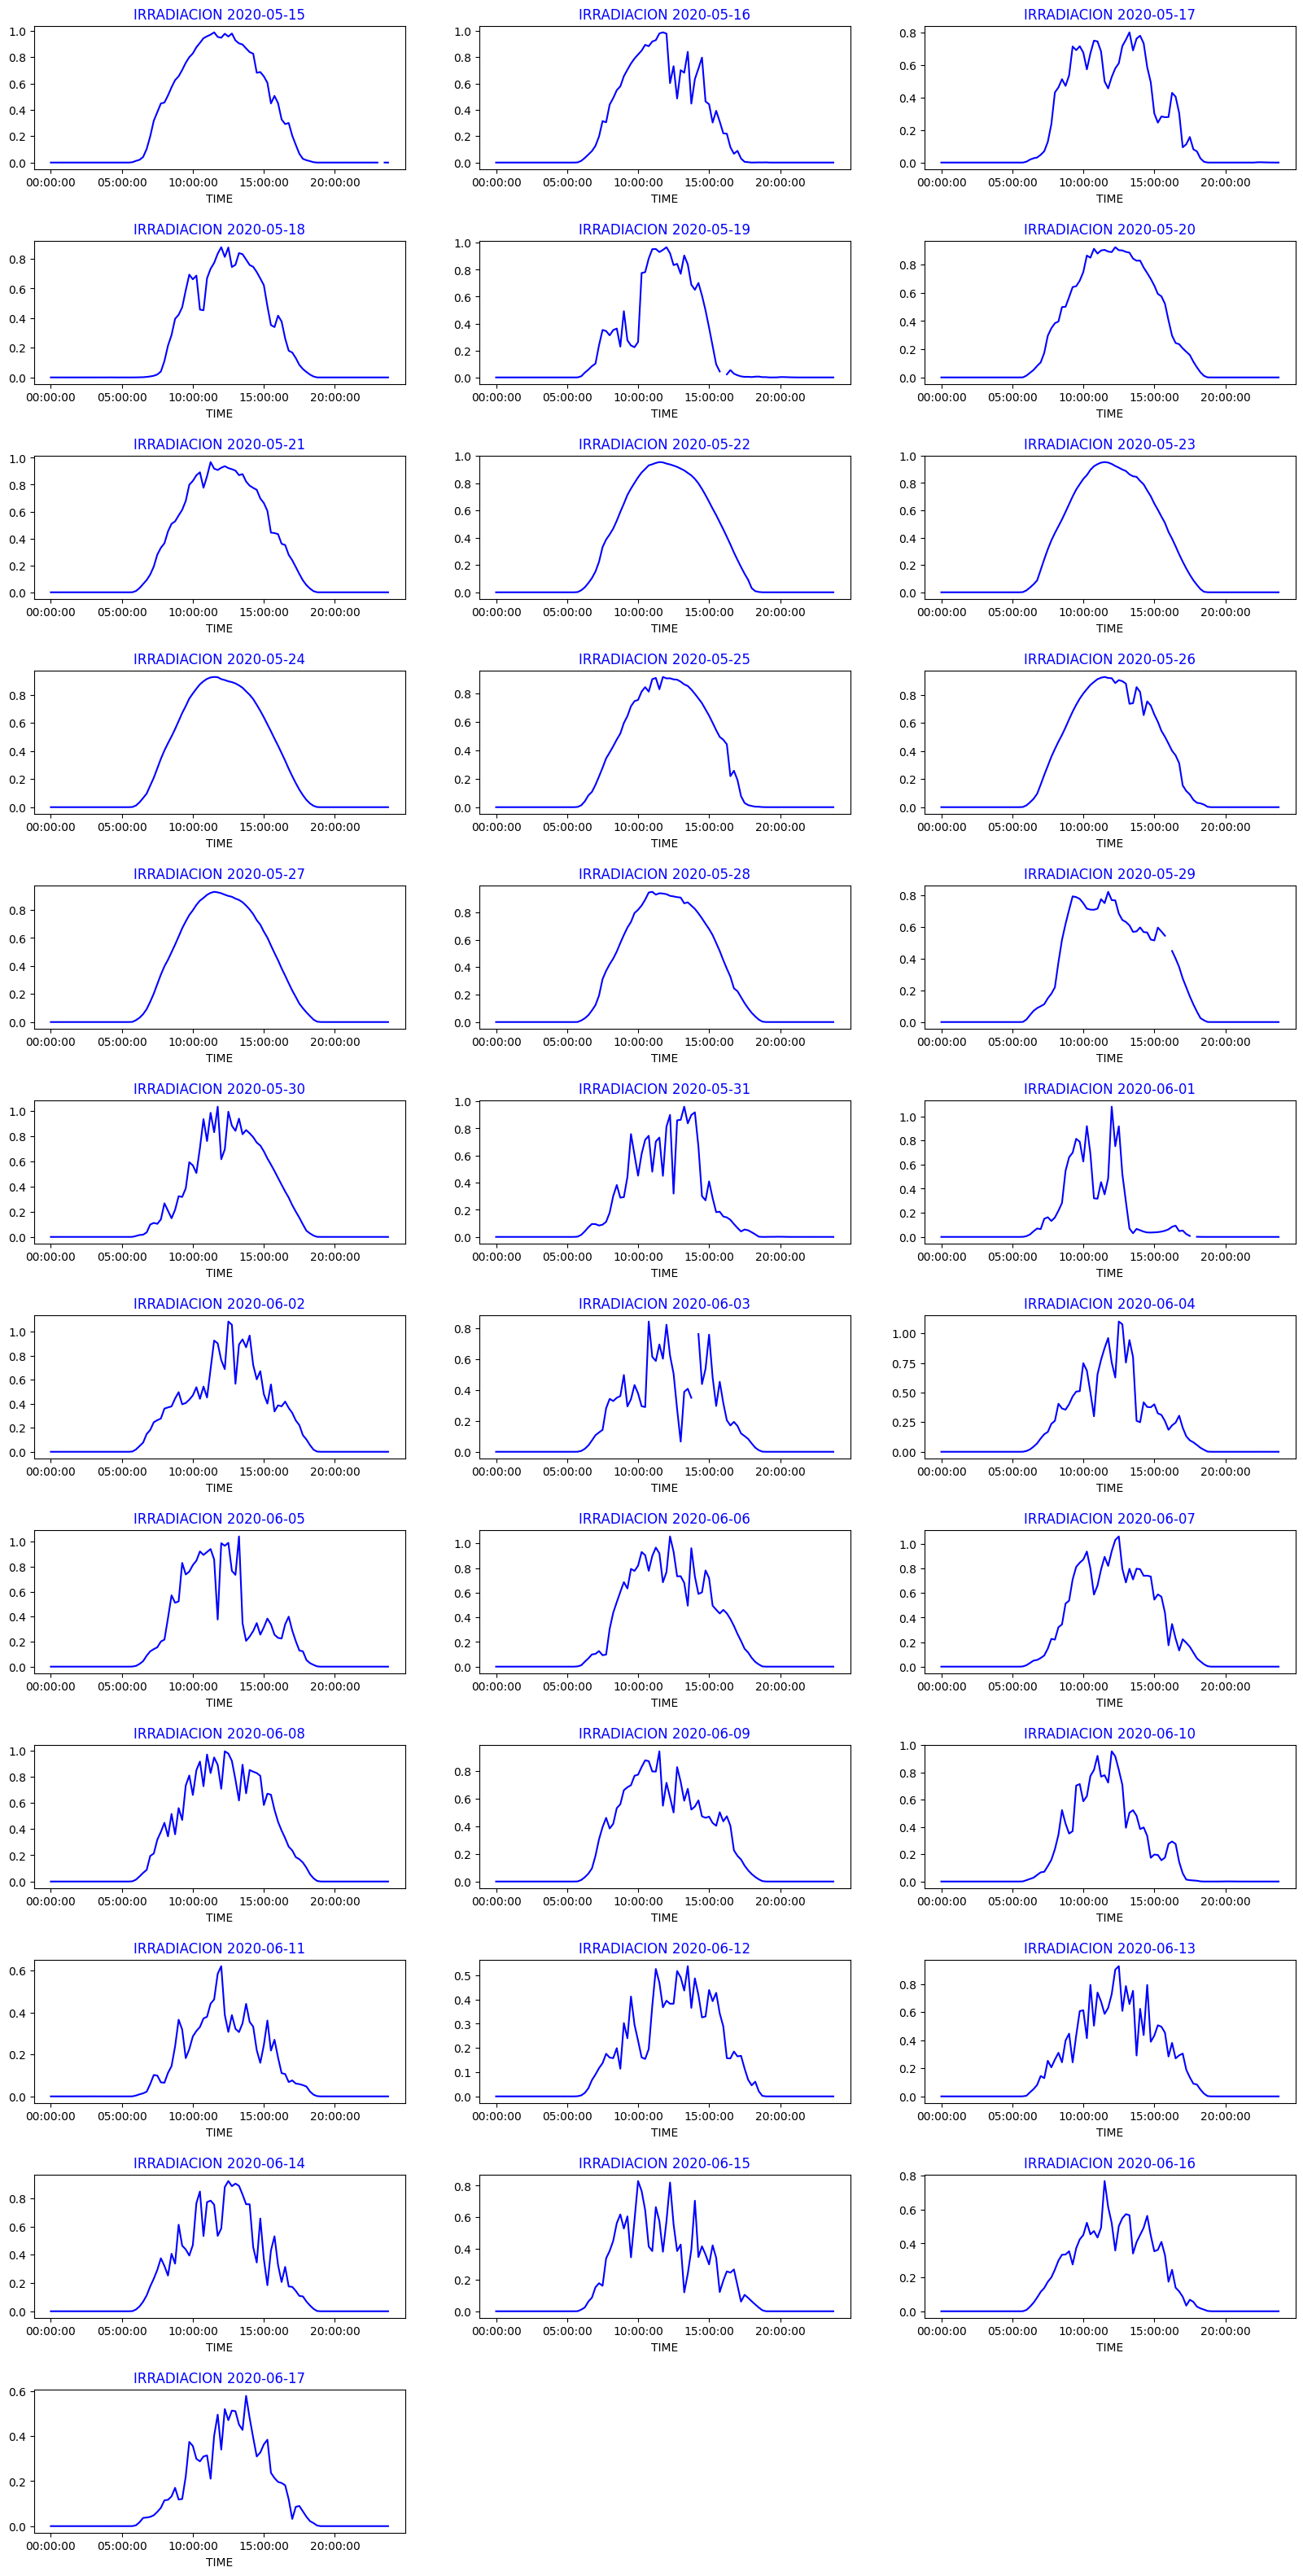

In [101]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIACION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

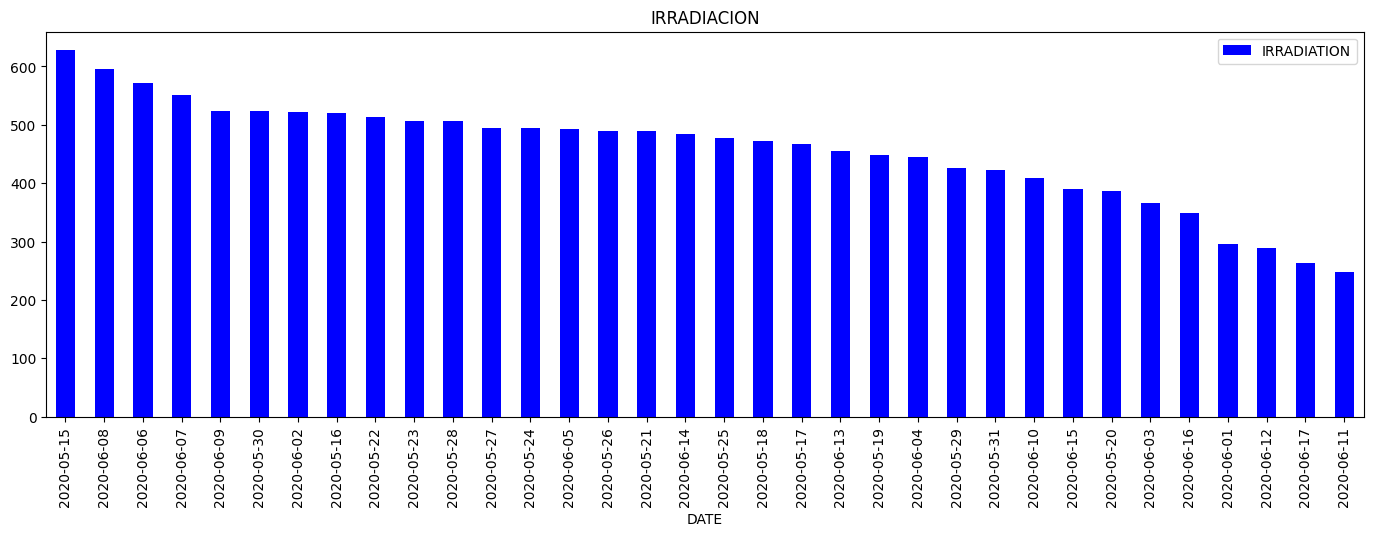

In [102]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIACION')
plt.show()

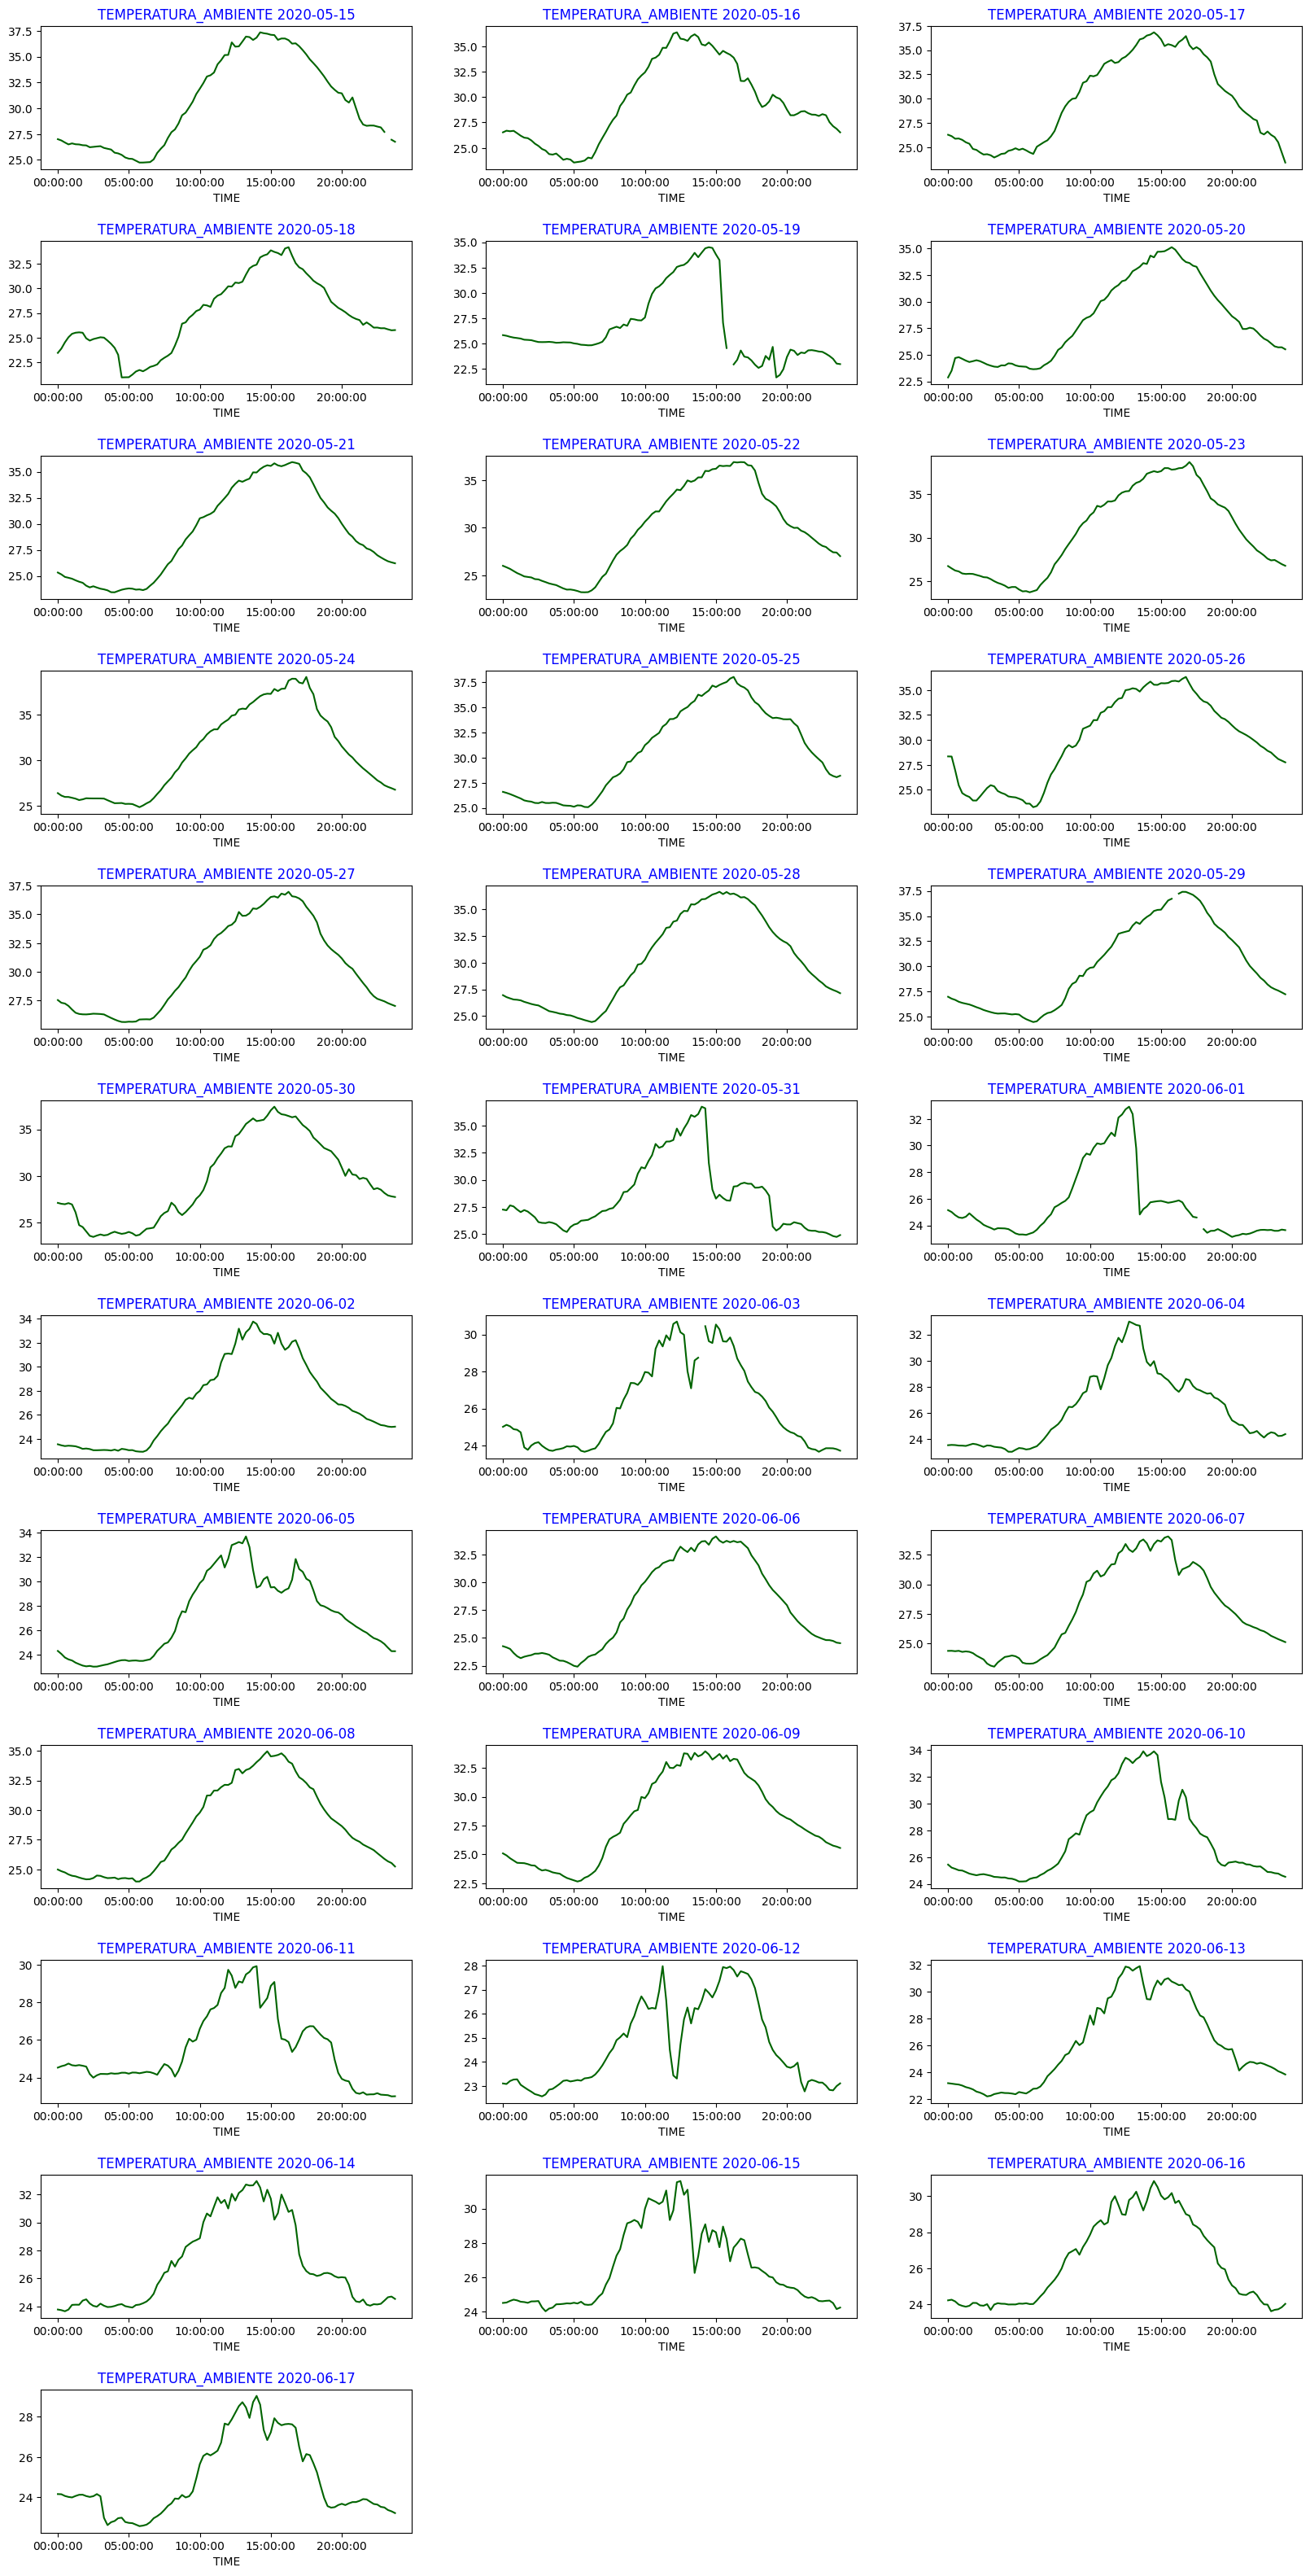

In [103]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='TEMPERATURA_AMBIENTE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

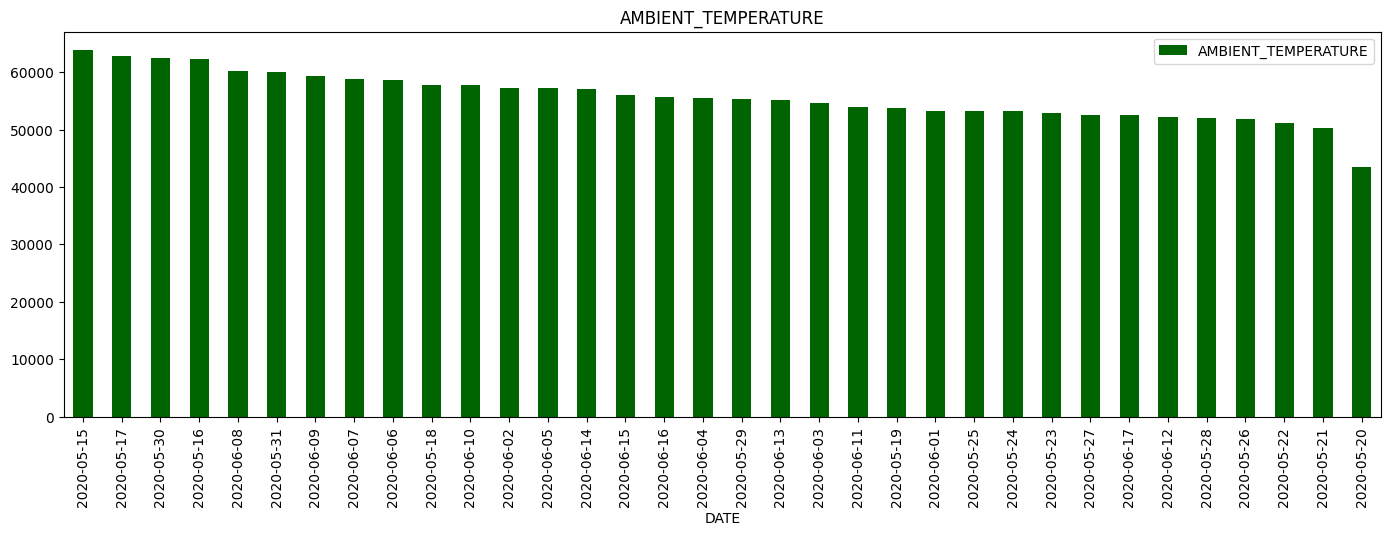

In [104]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

**ANALIZANDO EL MEJOR DIA**

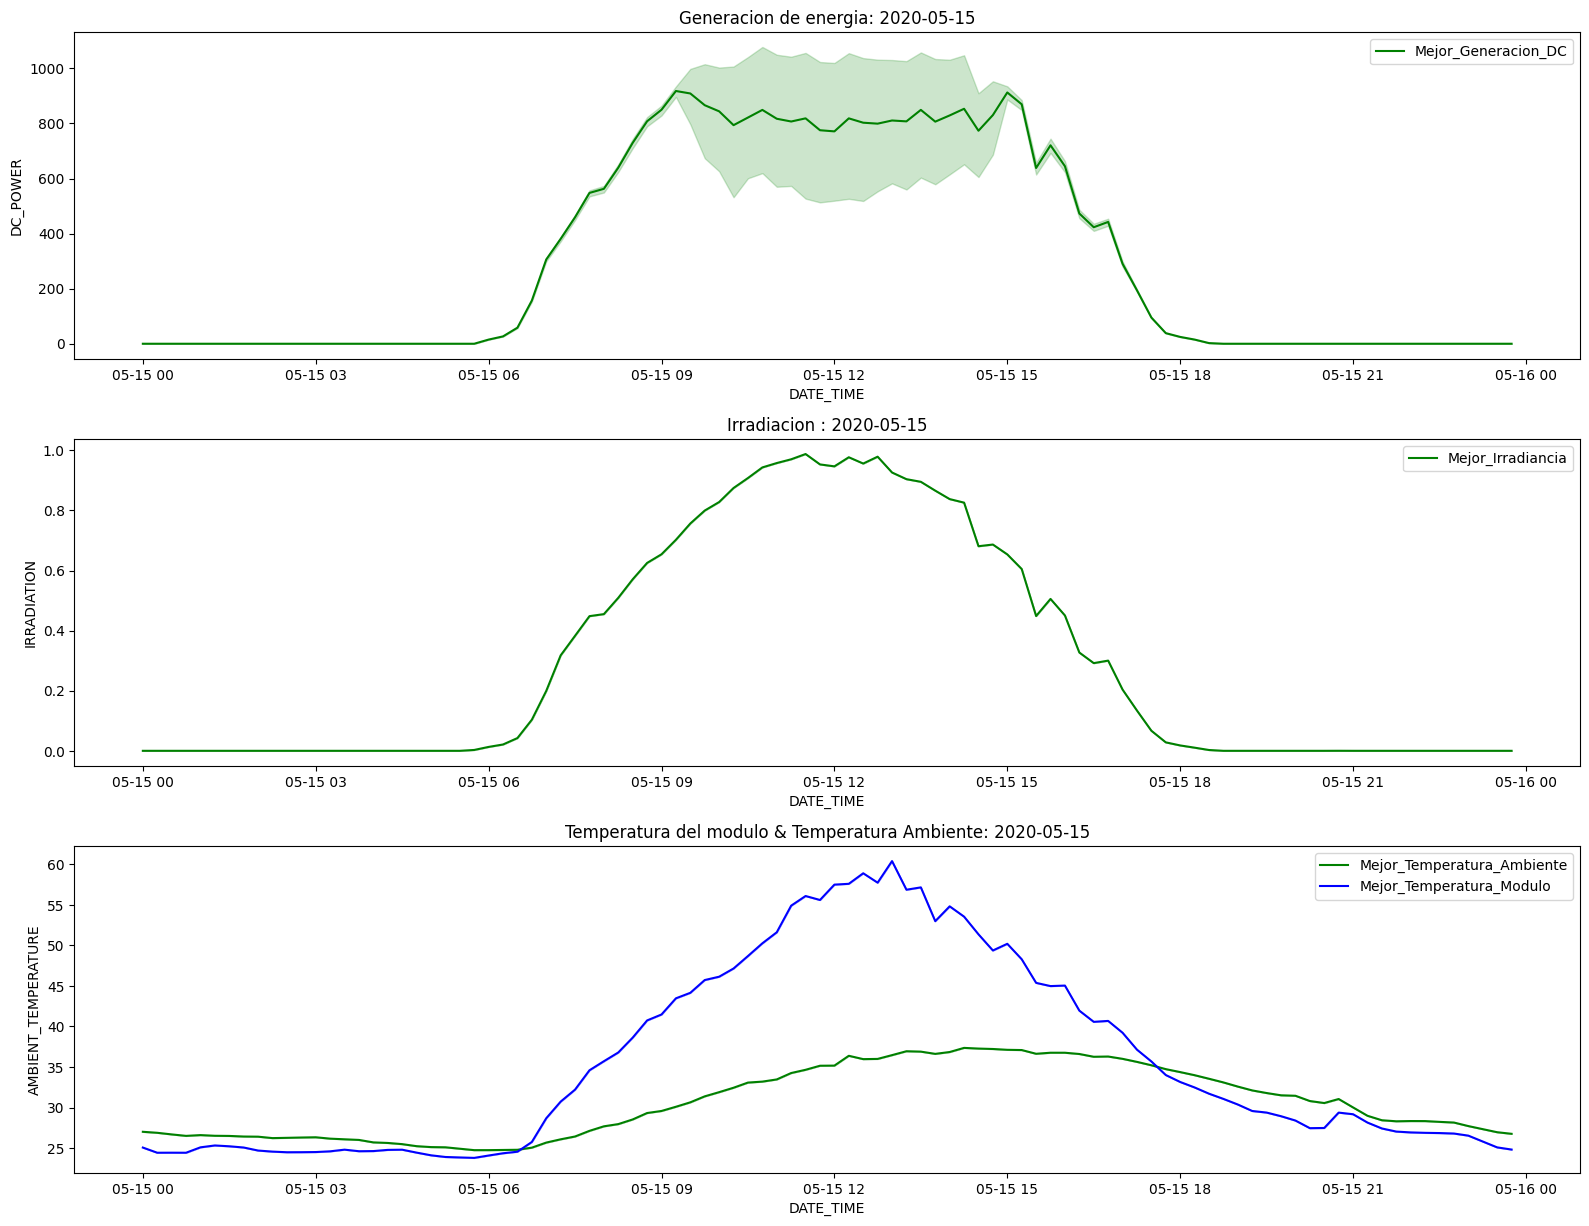

In [105]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='DC_POWER', label="Mejor_Generacion_DC",color='green')
plt.title("Generacion de energia: {}" .format(date[0]))

plt.subplot(412)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='IRRADIATION', label="Mejor_Irradiancia",color='green')
plt.title("Irradiacion : {}" .format(date[0]))

plt.subplot(413)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='AMBIENT_TEMPERATURE', label="Mejor_Temperatura_Ambiente",color='green')
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='MODULE_TEMPERATURE', label="Mejor_Temperatura_Modulo",color='blue')
plt.title("Temperatura del modulo & Temperatura Ambiente: {}" .format(date[0]));

plt.tight_layout()
plt.show()

LA MENOR VARIACION DE IRRADIANCIA, TEMPERATURA DEL PANEL, Y TEMPERATURA AMBIENTE INDICA QUE ESE DIA HUBO POCAS NUBES EN EL CIELO

**ANALIZANDO EL PEOR DIA**

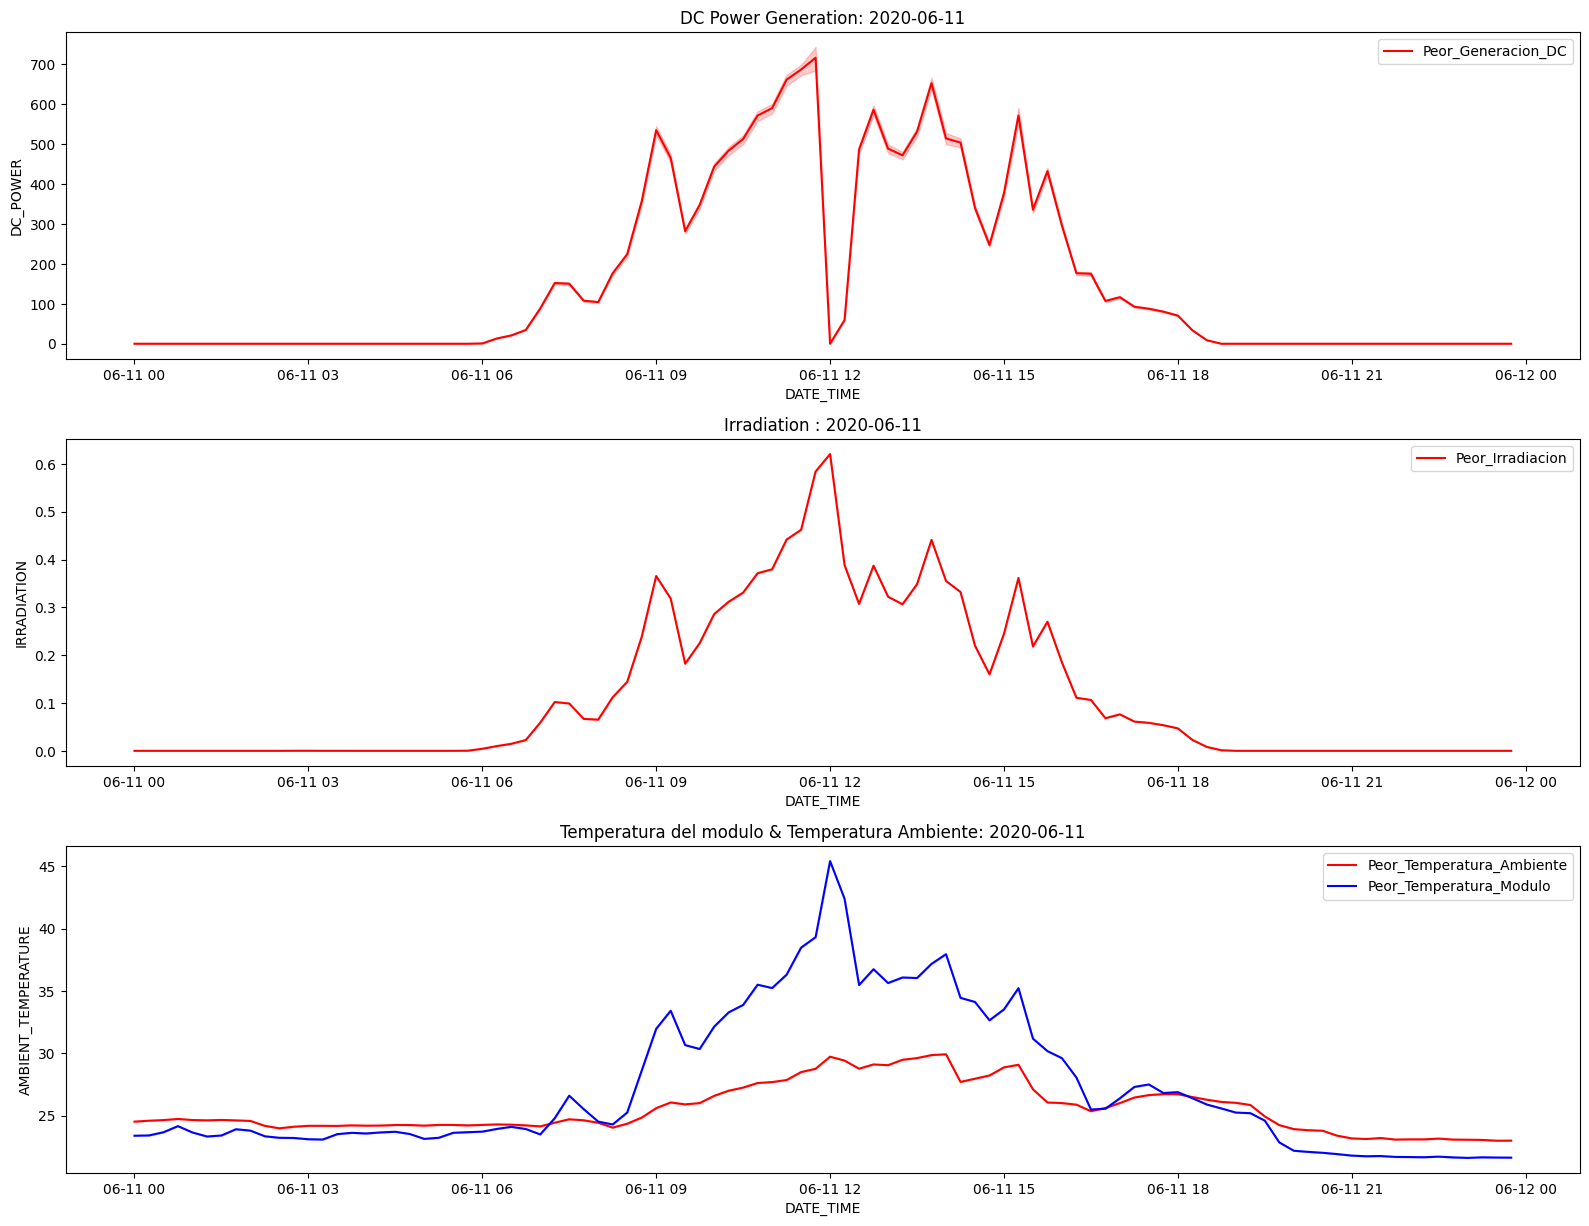

In [106]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='DC_POWER', label="Peor_Generacion_DC",color='red')
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='IRRADIATION', label="Peor_Irradiacion",color='red')
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='AMBIENT_TEMPERATURE', label="Peor_Temperatura_Ambiente",color='red')

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='MODULE_TEMPERATURE', label="Peor_Temperatura_Modulo",color='blue')
plt.title("Temperatura del modulo & Temperatura Ambiente: {}" .format(date[0]));

plt.tight_layout()
plt.show()

**Posibles razones de estas grandes fluctuaciones en DC_POWER, IRRADIACIÓN, temperatura ambiente, temperatura del módulo:**





Aproximadamente a las 12 en punto se produce una fuerte caída en la generación DC_POWER de 700 a casi 20 KW.

Y al mismo tiempo la IRRADIACIÓN cae de 0,6 a 0,3 casi la mitad.

La temperatura ambiente y la temperatura del módulo también caen drásticamente. La temperatura del módulo de 45 C a 35 C y la temperatura ambiente también se reducen.

**La posible razón de esta reducción se debe a que pueden haber fuertes lluvias, un cielo muy nublado y mal tiempo. Hay casi menos posibilidades de que se produzca algún fallo en el sistema.**

# EFICIENCIA DEL INVERSOR

PLANTA 1

In [107]:
solar_dc_power1 = df_solar_test[df_solar_test['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power1 = df_solar_test[df_solar_test['AC_POWER'] > 0]['AC_POWER'].values

In [108]:
solar_plant_eff = (np.max(solar_ac_power1)/np.max(solar_dc_power1 ))*100
print(f"Relación de potencia AC/CD (eficiencia) de la planta 2 de energía solar:  {solar_plant_eff:0.3f} %")

Relación de potencia AC/CD (eficiencia) de la planta 2 de energía solar:  9.750 %


SE PUEDE OBSERVAR QUE EN LA PLANTA 1 LA RELACION ENTRE LA CONVERCION DE CORREINTE CONTINUA Y ALTERNA ES MUY BAJA. PUEDE DEBERSE A:

1. El sensor no recibe la información correcta.
2. Los datos están equivocados por un factor.
3. Los inversores funcionan de manera ineficiente

PLANTA 2

In [109]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [110]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Relación de potencia AC/CD (eficiencia) de la planta 2 de energía solar:  {solar_plant_eff:0.3f} %")

Relación de potencia AC/CD (eficiencia) de la planta 2 de energía solar:  97.501 %


COMPARANDO LA RELACION DE POTENCIA ENTRE AMBAS PLANTAS, SE PUEDE OBSERVAR QUE LA DIFERENCIA ENTRE AMBAS ES POR UN FACTOR DE 10. POR LO QUE, PROBABLEMENTE SEA UN ERROR DE LECTURA Y NO UNA CUESTION DE INEFICIENCIA

Corriegiendo...

In [137]:
df_solar[['DC_POWER','AC_POWER']].iloc[1000:1010]

,DC_POWER,AC_POWER
1000,0.000,0.000
1001,0.000,0.000
1002,1253.287,1221.980
1003,1298.843,1266.371
1004,1275.853,1243.953
1005,1272.900,1241.067
1006,0.000,0.000
1007,1208.000,1178.160
1008,0.000,0.000
1009,1289.500,1257.264


In [136]:
df_solar_test[['DC_POWER','AC_POWER']].iloc[1000:1010]

,DC_POWER,AC_POWER
1002,8083.857,790.200
1003,7353.125,719.062
1004,7060.286,690.757
1005,5802.143,568.571
1006,7745.000,757.571
1007,7697.000,752.643
1008,6705.286,656.571
1009,6970.571,682.443
1010,6061.429,593.814
1011,5585.571,547.400


Se puede observar que los valores de DC power son muy altos

In [138]:
df_solar_test['DC_POWER']= df_solar_test['DC_POWER'].astype('float')/10

In [139]:
df_solar_test[['DC_POWER','AC_POWER']].iloc[1000:1010]

,DC_POWER,AC_POWER
1002,808.386,790.200
1003,735.312,719.062
1004,706.029,690.757
1005,580.214,568.571
1006,774.500,757.571
1007,769.700,752.643
1008,670.529,656.571
1009,697.057,682.443
1010,606.143,593.814
1011,558.557,547.400


In [141]:
solar_dc_power1 = df_solar_test[df_solar_test['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power1 = df_solar_test[df_solar_test['AC_POWER'] > 0]['AC_POWER'].values

solar_plant_eff = (np.max(solar_ac_power1)/np.max(solar_dc_power1 ))*100
print(f"Relación de potencia AC/CD (eficiencia) de la planta 2 de energía solar:  {solar_plant_eff:0.3f} %")

Relación de potencia AC/CD (eficiencia) de la planta 2 de energía solar:  97.501 %


**CURVA CARACTERISTICA DE EFICIENCIA DEL INVERSOR**

PLANTA 1

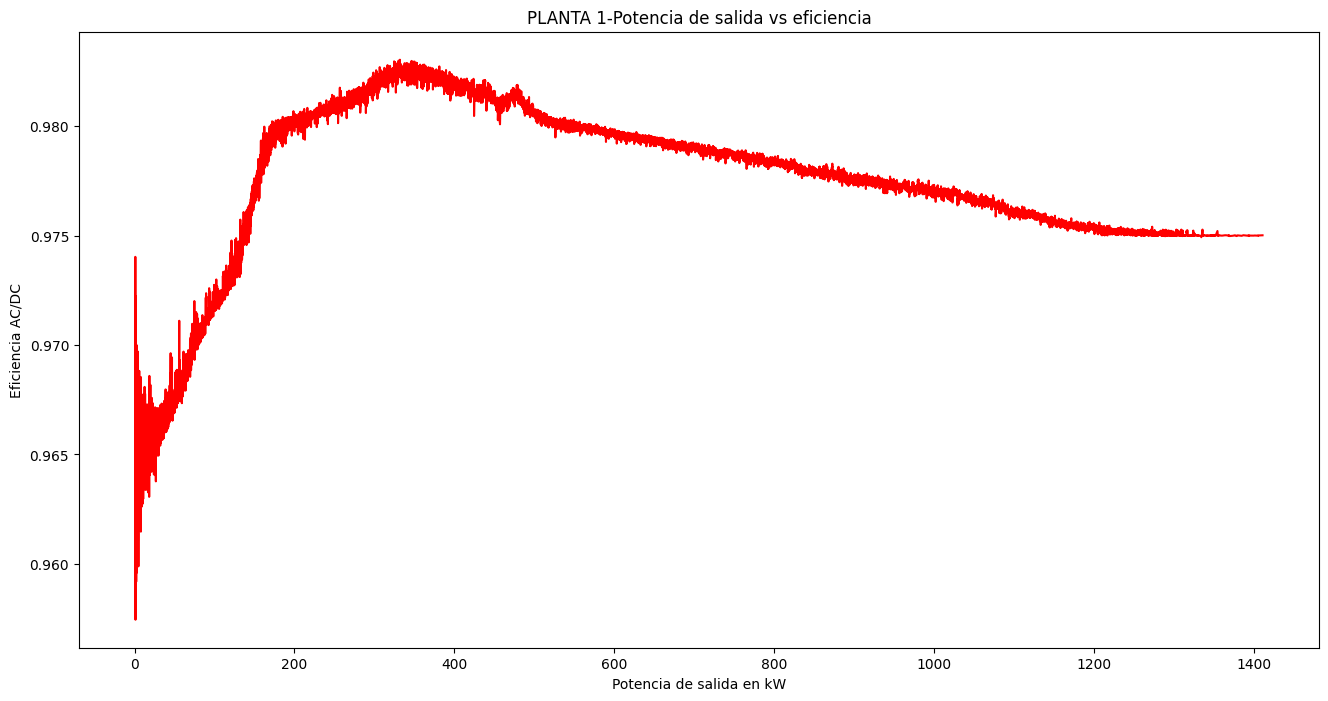

In [147]:
AC_list=[]
for i in df_solar_test['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)
#Aquí tomamos todos los valores de CD distintos de cero y los trazamos en un histograma.
DC_list=[]
for i in df_solar_test['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)


plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='red')
plt.xlabel('Potencia de salida en kW')
plt.ylabel('Eficiencia AC/DC')
plt.title('PLANTA 1-Potencia de salida vs eficiencia');

PLANTA 2

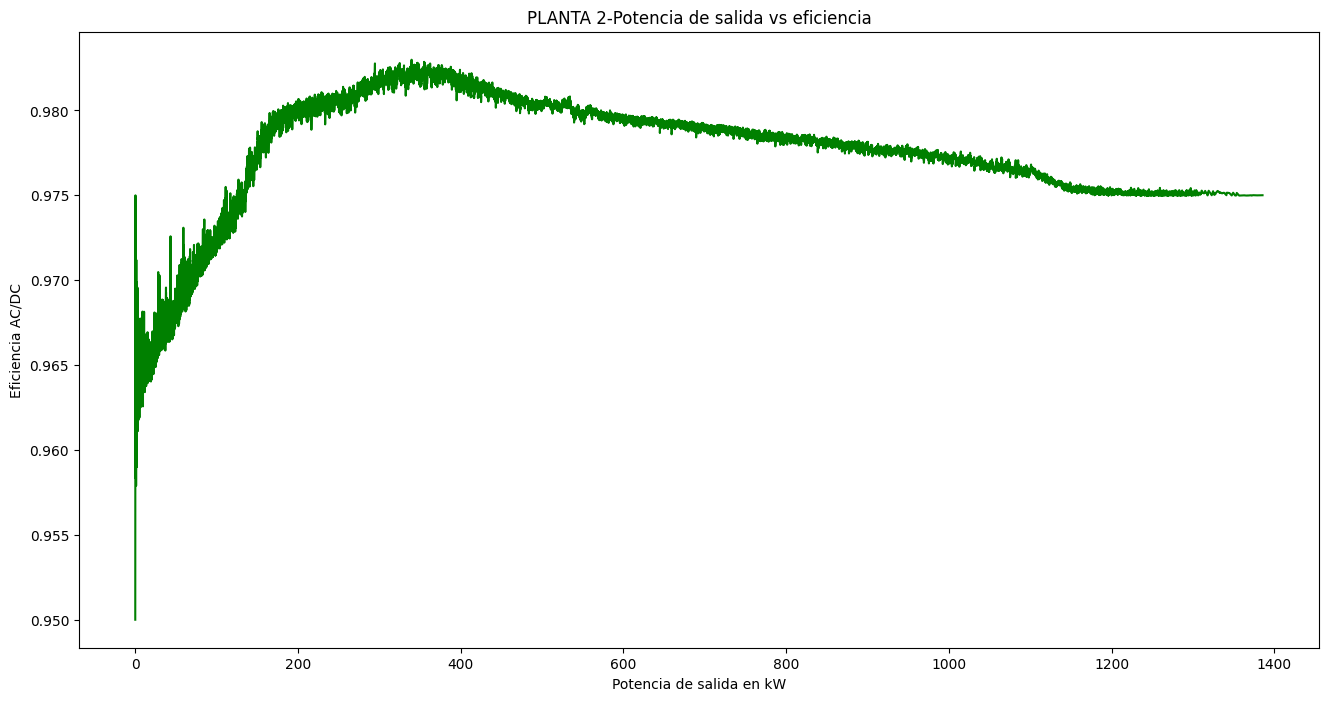

In [148]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)
#Aquí tomamos todos los valores de CD distintos de cero y los trazamos en un histograma.
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)


plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Potencia de salida en kW')
plt.ylabel('Eficiencia AC/DC')
plt.title('PLANTA 2-Potencia de salida vs eficiencia');

[COINCIDEN CON LA CURVA CARACTERISTICA DE EFICIENCIA DEL INVERSOR](https://topbateriaexterna.com/wp-content/uploads/2019/06/eficiencia-inversor-de-corriente.jpg)

# CONCLUSIONES FINALES

EL MEJOR MODELO PARA ENTRENAR UNA PLANTA DE GENERACION DE ENERGIA SOLAR, FUNCIONANDO CONSTANTEMENTE, ES EL DE LA PLANTA 1

Estableciendo el dataset para el entrenamiento

In [149]:
#df_solar es el dataset utilizado en el entrenamiento
df_solar_copy=df_solar
df_solar=df_solar_test

In [151]:
import os

# Crear la carpeta 'output' si no existe
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Guardar el DataFrame df_solar en la carpeta 'output' como 'df_solar.csv'
df_solar.to_csv(f'{output_dir}/df_solar.csv', index=False)



Guardando el dataset de la planta 2, para posibles testeos

In [152]:
df_solar_test=df_solar_copy

In [153]:

import os

# Crear la carpeta 'output' si no existe
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Guardar el DataFrame df_solar en la carpeta 'output' como 'df_solar.csv'
df_solar_test.to_csv(f'{output_dir}/df_solar_test.csv', index=False)


